In [32]:
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

import time
import matplotlib.dates as mdates
from datetime import datetime

In [33]:
# pandas string display length
pd.options.display.max_colwidth = 1000

# allow to display plots
%matplotlib inline

In [34]:
train_df = pd.read_csv('../data/train_eng.csv')
test_df = pd.read_csv('../data/test_eng.csv')
compl_df = pd.read_csv('../data/complaints_train.csv')

In [35]:
subm_df = pd.read_csv('../data/sample_submission.csv')

In [36]:
subm_df.head()

unique_id  target
0  47ed5cbfe2e44cb089c7879722fbe3f4_e15fc7eace2cc071490ac3c8aaaea261       0
1  f9a1a6499cf04091a149c5f82c652d2f_6f5a9384547f229e259fe673473d8d2b       0
2  bf779f5547cb43f3a3c8014fa8c3a6ca_f7efe9cbc9ca0fe18cebdebb0b1b1084       0
3  8bdf2c96ddf047538c93b0f4c763f895_e91eeaff5e455f1185a1d6ef5eabaf7e       0
4  ccc361524d9e4743ab0a72eb47b3be44_173e4adae55dc3f0d5009780161450ab       0

In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946154 entries, 0 to 946153
Data columns (total 29 columns):
Unnamed: 0             946154 non-null int64
CPV2017                946154 non-null object
SumTender              946154 non-null float64
Participant            946154 non-null object
Organizer              946154 non-null object
ID                     946154 non-null object
IDLOT                  946154 non-null object
1RoundSum              946154 non-null object
2RoundSum              946154 non-null object
3RoundSum              946154 non-null object
StartOfferDate         946154 non-null object
TypeMethod             946154 non-null object
TypeOrginizer          946154 non-null object
LotStatus              946154 non-null object
TenderStatus           946154 non-null object
OrgRegion              946154 non-null object
ParticipantRegion      946154 non-null object
DeliveryRegion         946154 non-null object
result                 946154 non-null int64
Tender          

In [38]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75969 entries, 0 to 75968
Data columns (total 22 columns):
Unnamed: 0             75969 non-null int64
CPV2017                75969 non-null object
SumTender              75969 non-null float64
Organizer              75969 non-null object
ID                     75969 non-null object
IDLOT                  75969 non-null object
StartOfferDate         75969 non-null object
TypeMethod             75969 non-null object
TypeOrginizer          75969 non-null object
LotStatus              75969 non-null object
TenderStatus           75969 non-null object
OrgRegion              75969 non-null object
DeliveryRegion         75969 non-null object
Tender                 75969 non-null object
StartDateCorrection    75969 non-null object
LotDescr               75969 non-null object
IDOrganizator          75969 non-null float64
EndDate                75969 non-null object
EndOfferDate           75969 non-null object
StepDecreaseLot        75969 non-nu

In [39]:
train_df = train_df[train_df['LotStatus'] == 
         'Завершено лот закупівлі'][train_df['TenderStatus'] == 
                                    'complete']

/home/dima/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
train_df[train_df['StartDateCorrection'].isna()]

Unnamed: 0  \
2292          2292   
2596          2596   
2856          2856   
5239          5239   
5425          5425   
7808          7808   
10151        10151   
10561        10561   
12423        12423   
14599        14599   
18239        18239   
19469        19469   
21090        21090   
25913        25913   
28359        28359   
29970        29970   
30654        30654   
31904        31904   
39791        39791   
40146        40146   
42292        42292   
43752        43752   
43983        43983   
45115        45115   
48930        48930   
49310        49310   
51268        51268   
51408        51408   
52120        52120   
52475        52475   
...            ...   
882011      882011   
882017      882017   
882297      882297   
882455      882455   
884485      884485   
887759      887759   
890139      890139   
890140      890140   
890514      890514   
890515      890515   
899462      899462   
899483      899483   
908597      908597   
908723      908723   
908787      908787   
908790      908790   
908812      908812   
916324      916324   
916375      916375   
930592      930592   
930618      930618   
930690      930690   
930731      930731   
930857      930857   
932474      932474   
935448      935448   
943107      943107   
943126      943126   
944839      944839   
945094      945094   

                                                                               CPV2017  \
2292                                                                                 -   
2596                                                                                 -   
2856                                                                                 -   
5239                                                                                 -   
5425                                                                                 -   
7808                                                                                 -   
10151                                                                                -   
10561                                                                                -   
12423                                                                                -   
14599                                                                                -   
18239                                                                                -   
19469                                                                                -   
21090                                                                                -   
25913                                                                                -   
28359                                                                                -   
29970                                                                                -   
30654                                                                                -   
31904                                                                                -   
39791                                                                                -   
40146                                                                                -   
42292                                                                                -   
43752                                                                                -   
43983                                                                                -   
45115                                                                                -   
48930                                                                                -   
49310                                                                                -   
51268                                                                                -   
51408                                                                                -   
52120                            

In [41]:
print('******** Train DF *********')

print("Data size : %d x %d\n" % (train_df.shape[0], train_df.shape[1]))

categorical_columns = [c for c in train_df.columns if train_df[c].dtype.name == 'object']
numerical_columns   = [c for c in train_df.columns if train_df[c].dtype.name != 'object']
print('*'*30)
print('Categorical columns:')

for column in categorical_columns:
    print(train_df[train_df[column] == '-'][column].count(), '\t', column)
print()
print('*'*30)
print('Numerical columns:')
print()
print('\n'.join(numerical_columns))

******** Train DF *********
Data size : 663145 x 29

******************************
Categorical columns:
69357 	 CPV2017
0 	 Participant
0 	 Organizer
0 	 ID
0 	 IDLOT
97873 	 1RoundSum
97873 	 2RoundSum
97873 	 3RoundSum
0 	 StartOfferDate
0 	 TypeMethod
0 	 TypeOrginizer
0 	 LotStatus
0 	 TenderStatus
121 	 OrgRegion
60628 	 ParticipantRegion
10711 	 DeliveryRegion
0 	 Tender
0 	 StartDateCorrection
296655 	 LotDescr
0 	 OfferDate
0 	 EndDate
0 	 EndOfferDate
111391 	 GuaranteeValueLot
0 	 unique_id

******************************
Numerical columns:

Unnamed: 0
SumTender
result
IDOrganizator
StepDecreaseLot


In [42]:
print('Absent in TEST DF')
set(train_df.columns) - set(test_df.columns)

Absent in TEST DF


{'1RoundSum',
 '2RoundSum',
 '3RoundSum',
 'OfferDate',
 'Participant',
 'ParticipantRegion',
 'result'}

In [43]:
print('******** TEST DF *********')

print("Data size : %d x %d\n" % (test_df.shape[0], test_df.shape[1]))

categorical_columns = [c for c in test_df.columns if test_df[c].dtype.name == 'object']
numerical_columns   = [c for c in test_df.columns if test_df[c].dtype.name != 'object']
print('*'*30)
print('Categorical columns:')

for column in categorical_columns:
    print(test_df[test_df[column] == '-'][column].count(), '\t', column)
print()
print('*'*30)
print('Numerical columns:')
print()
print('\n'.join(numerical_columns))

******** TEST DF *********
Data size : 75969 x 22

******************************
Categorical columns:
5378 	 CPV2017
0 	 Organizer
0 	 ID
0 	 IDLOT
0 	 StartOfferDate
0 	 TypeMethod
0 	 TypeOrginizer
0 	 LotStatus
0 	 TenderStatus
7 	 OrgRegion
1153 	 DeliveryRegion
0 	 Tender
0 	 StartDateCorrection
33690 	 LotDescr
0 	 EndDate
0 	 EndOfferDate
8700 	 GuaranteeValueLot
0 	 unique_id

******************************
Numerical columns:

Unnamed: 0
SumTender
IDOrganizator
StepDecreaseLot


In [44]:
counted_values = train_df['TypeMethod'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(counted_values.index, counted_values.values, 
            alpha=0.8, 
            color='green') # w/o set color will be rainbow
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('methods', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [45]:
train_df = train_df[train_df['LotStatus'] == 
         'Завершено лот закупівлі'][train_df['TenderStatus'] == 
                                    'complete']

In [46]:
data = train_df['StartOfferDate'].apply(lambda x: 
                                        datetime.timestamp(datetime.strptime(x, '%Y-%m-%d')))

# convert the epoch format to matplotlib date format 
mpl_data = mdates.epoch2num(data)

# plot it
fig, ax = plt.subplots(figsize=(18,10))
ax.hist(mpl_data, bins=50, color='lightblue')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.title('StartOfferDate Distribution', size=15)
plt.xticks(rotation='vertical')
# plt.figure(figsize=(8,16))
plt.show();

In [47]:
data = train_df['EndOfferDate'].apply(lambda x: 
                                        datetime.timestamp(datetime.strptime(x, '%Y-%m-%d')))

# convert the epoch format to matplotlib date format 
mpl_data = mdates.epoch2num(data)

# plot it
fig, ax = plt.subplots(figsize=(18,10))
ax.hist(mpl_data, bins=50, color='lightblue')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.title('EndOfferDate Distribution', size=15)
plt.xticks(rotation='vertical')
# plt.figure(figsize=(8,16))
plt.show()

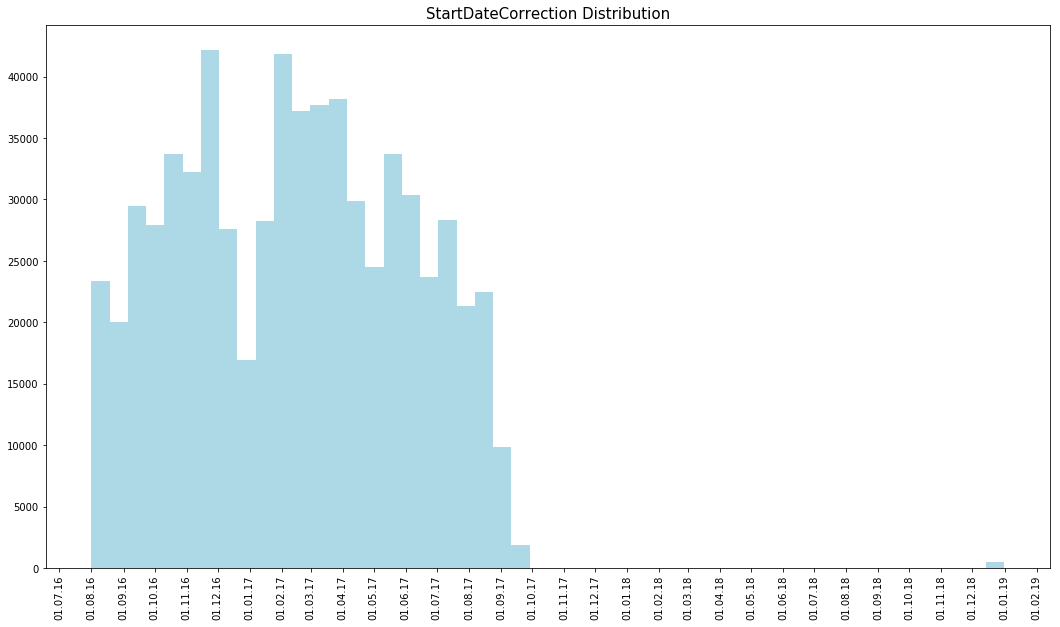

In [48]:
train_df[train_df['StartDateCorrection'].isna()] = '2019-01-01'
data = train_df['StartDateCorrection'].apply(lambda x: 
                                        datetime.timestamp(datetime.strptime(x, '%Y-%m-%d')))

# convert the epoch format to matplotlib date format 
mpl_data = mdates.epoch2num(data)

# plot it
fig, ax = plt.subplots(figsize=(18,10))
ax.hist(mpl_data, bins=50, color='lightblue')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.title('StartDateCorrection Distribution', size=15)
plt.xticks(rotation='vertical')
# plt.figure(figsize=(8,16))
plt.show()

In [49]:
train_df[train_df['EndDate'].isna()] = '2019-01-01'
data = train_df['EndDate'].apply(lambda x: 
                                        datetime.timestamp(datetime.strptime(x, '%Y-%m-%d')))

# convert the epoch format to matplotlib date format 
mpl_data = mdates.epoch2num(data)

# plot it
fig, ax = plt.subplots(figsize=(18,10))
ax.hist(mpl_data, bins=50, color='lightblue')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.title('EndDate Distribution', size=15)
plt.xticks(rotation='vertical')
# plt.figure(figsize=(8,16))
plt.show()

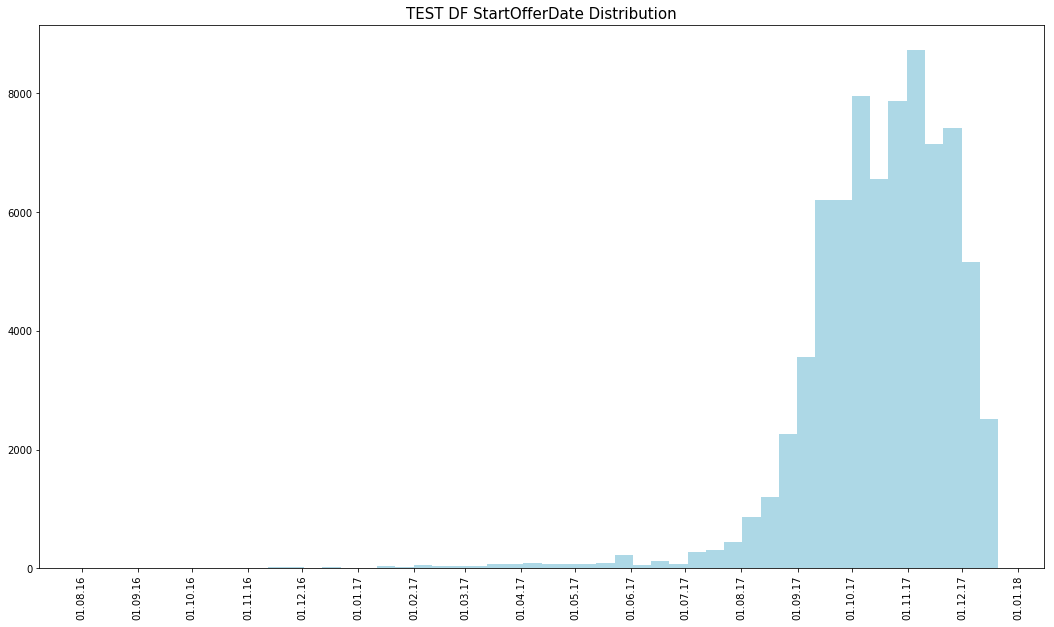

In [50]:
data = test_df['StartOfferDate'].apply(lambda x: 
                                        datetime.timestamp(datetime.strptime(x, '%Y-%m-%d')))

# convert the epoch format to matplotlib date format 
mpl_data = mdates.epoch2num(data)

# plot it
fig, ax = plt.subplots(figsize=(18,10))
ax.hist(mpl_data, bins=50, color='lightblue')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.title('TEST DF StartOfferDate Distribution', size=15)
plt.xticks(rotation='vertical')
# plt.figure(figsize=(8,16))
plt.show();

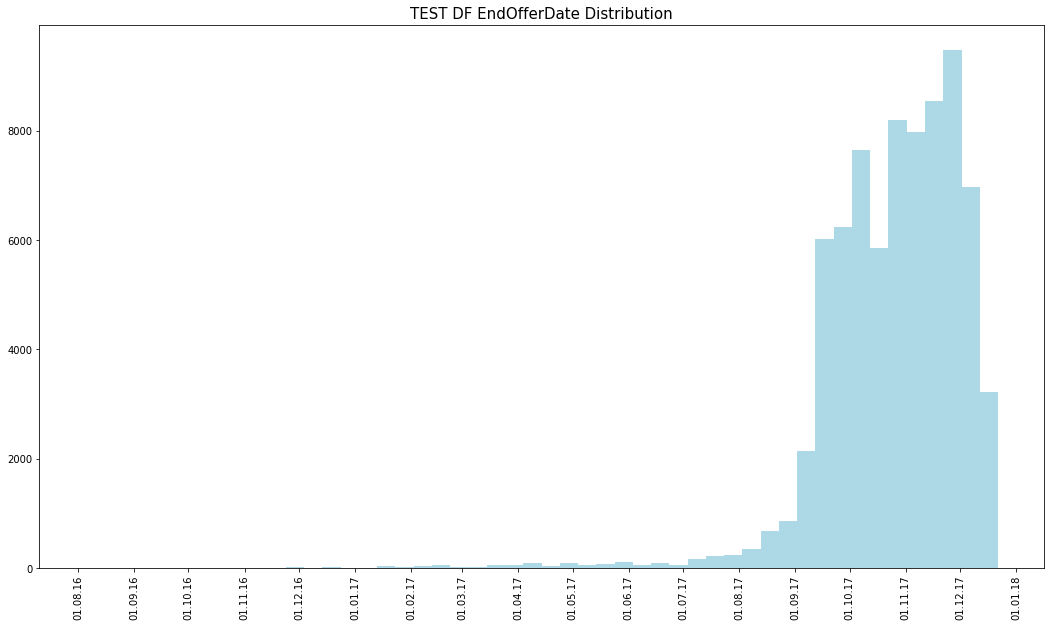

In [51]:
data = test_df['EndOfferDate'].apply(lambda x: 
                                        datetime.timestamp(datetime.strptime(x, '%Y-%m-%d')))

# convert the epoch format to matplotlib date format 
mpl_data = mdates.epoch2num(data)

# plot it
fig, ax = plt.subplots(figsize=(18,10))
ax.hist(mpl_data, bins=50, color='lightblue')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.title('TEST DF EndOfferDate Distribution', size=15)
plt.xticks(rotation='vertical')
# plt.figure(figsize=(8,16))
plt.show()

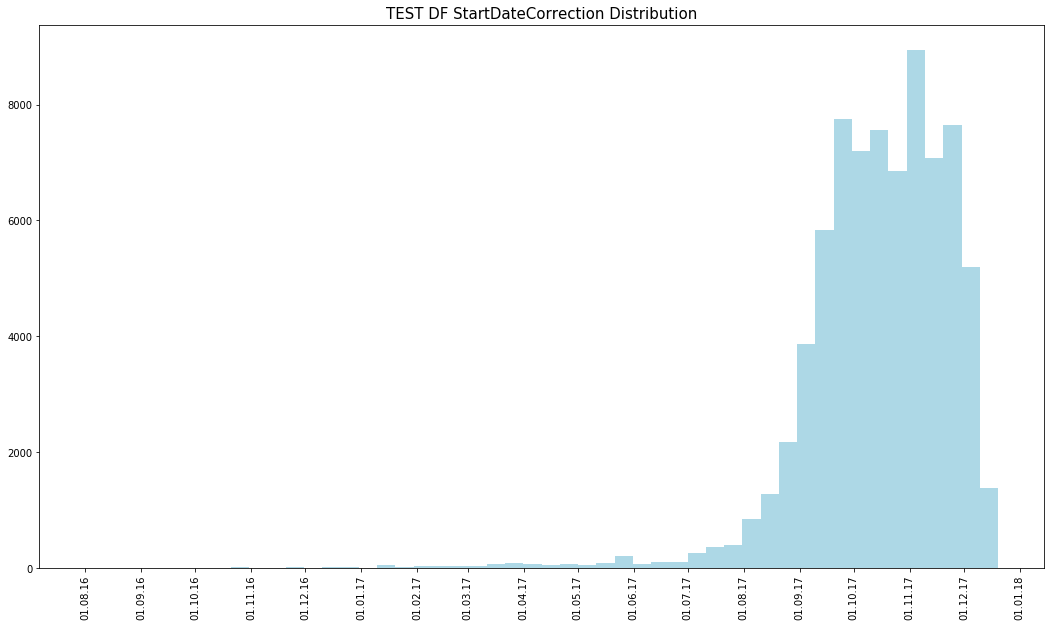

In [52]:
test_df[test_df['StartDateCorrection'].isna()] = '2019-01-01'
data = test_df['StartDateCorrection'].apply(lambda x: 
                                        datetime.timestamp(datetime.strptime(x, '%Y-%m-%d')))

# convert the epoch format to matplotlib date format 
mpl_data = mdates.epoch2num(data)

# plot it
fig, ax = plt.subplots(figsize=(18,10))
ax.hist(mpl_data, bins=50, color='lightblue')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.title('TEST DF StartDateCorrection Distribution', size=15)
plt.xticks(rotation='vertical')
# plt.figure(figsize=(8,16))
plt.show()

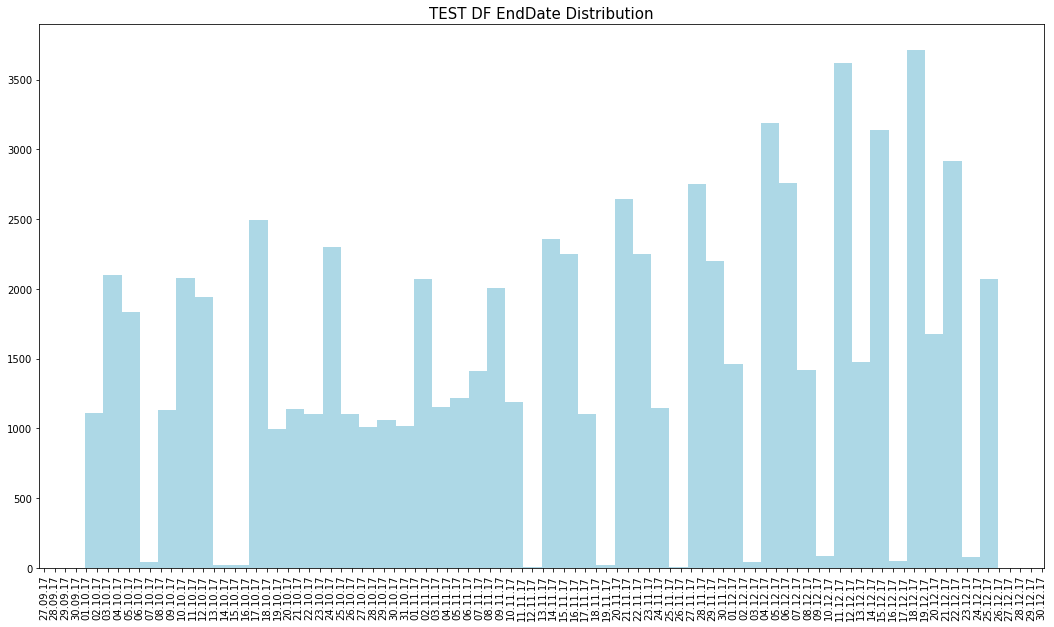

In [53]:
test_df[test_df['EndDate'].isna()] = '2019-01-01'
data = test_df['EndDate'].apply(lambda x: 
                                        datetime.timestamp(datetime.strptime(x, '%Y-%m-%d')))

# convert the epoch format to matplotlib date format 
mpl_data = mdates.epoch2num(data)

# plot it
fig, ax = plt.subplots(figsize=(18,10))
ax.hist(mpl_data, bins=50, color='lightblue')
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.title('TEST DF EndDate Distribution', size=15)
plt.xticks(rotation='vertical')
# plt.figure(figsize=(8,16))
plt.show()

In [54]:
train_df.sort_values(by=['EndDate'])['EndDate'].head()

284162    2016-08-09
182194    2016-08-09
490331    2016-08-09
490081    2016-08-09
502657    2016-08-09
Name: EndDate, dtype: object

In [55]:
train_df.sort_values(by=['EndDate'])['EndDate'].tail()

809030    2019-01-01
880218    2019-01-01
765662    2019-01-01
820490    2019-01-01
880243    2019-01-01
Name: EndDate, dtype: object

In [56]:
test_df.sort_values(by=['EndDate'])['EndDate'].head()

10230    2017-10-01
20331    2017-10-01
18012    2017-10-01
33200    2017-10-01
60511    2017-10-01
Name: EndDate, dtype: object

In [57]:
test_df.sort_values(by=['EndDate'])['EndDate'].tail()

65033    2017-12-26
65032    2017-12-26
3480     2017-12-26
29402    2017-12-26
35585    2017-12-26
Name: EndDate, dtype: object

In [58]:
train_df['EndDate'] = pd.to_datetime(train_df['EndDate'])
# train_df.info()

In [59]:
def add_cv_column(df):
    df['EndDate'] = pd.to_datetime(df['EndDate'])
    temp_df1 = df[df['EndDate'] <= "2017-06-30"]
    temp_df1['cv_status'] = 'train'
    temp_df2 = df[df['EndDate'] > "2017-06-30"]
    temp_df2['cv_status'] = 'cv'
    return pd.concat([temp_df1, temp_df2])

In [60]:
df_final = add_cv_column(train_df)

/home/dima/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/dima/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
df_final['cv_status'].value_counts()

train    519334
cv       143811
Name: cv_status, dtype: int64

In [62]:
df_final

Unnamed: 0                                     CPV2017    SumTender  \
0               0                                           -  5.86692e+06   
1               1                                           -  5.86692e+06   
3               3                                           -      93579.6   
4               4                                           -       855000   
5               5                                           -        55000   
6               6                                           -   2.0146e+06   
7               7                                           -   2.0146e+06   
8               8                                           -   2.0146e+06   
9               9                                           -   2.0146e+06   
10             10                                           -   2.0146e+06   
11             11                                           -       570000   
12             12                                           -        11000   
13             13                                           -         3400   
14             14                                           -         3400   
15             15                                           -      6.3e+06   
21             21                                           -       100000   
22             22                                           -       980087   
24             24                                           -       600000   
26             26                                           -       970000   
28             28                                           -       104933   
30             30                                           -       135000   
31             31                                           -        63000   
32             32                                           -        98208   
33             33                                           -       109000   
34             34                                           -         4950   
37             37                                           -      1.3e+06   
38             38                                           -      46241.2   
39             39                                           -       393393   
45             45                                           -  1.79478e+07   
46             46                                           -  1.79478e+07   
...           ...                                         ...          ...   
945186     945186  99999999-9 Не відображене в інших розділах       100000   
945211     945211  99999999-9 Не відображене в інших розділах        75000   
945212     945212  99999999-9 Не відображене в інших розділах        75000   
945218     945218  99999999-9 Не відображене в інших розділах         9700   
945221     945221  99999999-9 Не відображене в інших розділах        20000   
945222     945222  99999999-9 Не відображене в інших розділах        35000   
945223     945223  99999999-9 Не відображене в інших розділах        50000   
945224     945224  99999999-9 Не відображене в інших розділах        20000   
945236     945236  99999999-9 Не відображене в інших розділах        63200   
945246     945246  99999999-9 Не відображене в інших розділах         3500   
945290     945290  99999999-9 Не відображене в інших розділах         4200   
945291     945291  99999999-9 Не відображене в інших розділах         8490   
945292     945292  99999999-9 Не відображене в інших розділах         4550   
945301     945301  99999999-9 Не відображене в інших розділах      65390.8   
945316     945316  99999999-9 Не відображене в інших розділах       150000   
945331     945331  99999999-9 Не відображене в інших розділах        45000   
945332     945332  99999999-9 Не відображене в інших розділах        80000   
945333     945333  99999999-9 Не відображене в інших розділах        50000   
945334     945334  99999999-9 Не відображене в інших розділах        45000   
945335     945335  99999999-9